# Packages graphiques

Comme vu dans l'introduction *Julia* possède une bibliothèque de packages assez grande dont il n'est pas forcément aisé d'en faire le tri...

Je vous propose ici la description et utilisation de quelques classiques

En premier lieu un packages graphiques :
* **Plots**
* avec des backend **Gr**, **PyPlot**, **Plotly**

et deux packages plus "statistiques" : 

* **DataFrames**
* **RDatasets**

La gestion graphique ne fait pas partie intégrante de *Julia* il faut faire appel à des packages extérieurs et plusieurs choix sont possibles. En voici quelques uns

## Plots

Plots est basé sur une bibliothèque éprouvée MatPlotLib (en Python). Sa syntaxe est identique à celle de MATLAB 

```julia
(v1.1) pkg> add Plots
(v1.1) pkg> add PlotlyJS
(v1.1) pkg> add PyPlot
```

In [1]:
using Plots 

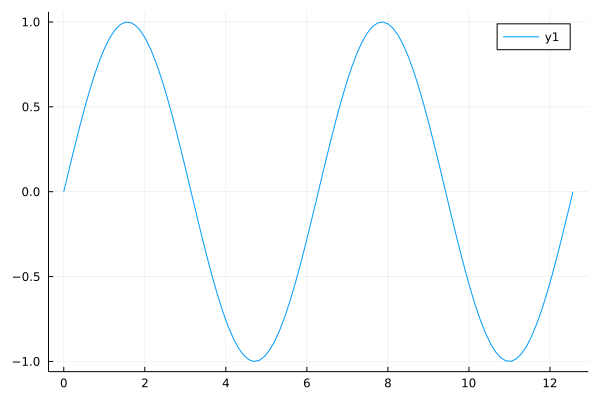

In [4]:
x = LinRange(0, 4π, 100)
plot(x,sin.(x))

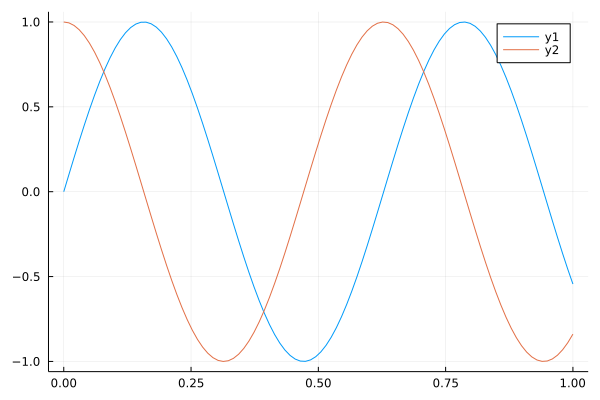

In [6]:
x= LinRange(0, 1, 100)
plot(x,sin.(10*x))
plot!(x,cos.(10*x))

In [12]:
import Pkg

Pkg.add("Plots")

   Resolving package versions...
  No Changes to `~/JuliaProjects/Julia_Introduction/Project.toml`
  No Changes to `~/JuliaProjects/Julia_Introduction/Manifest.toml`


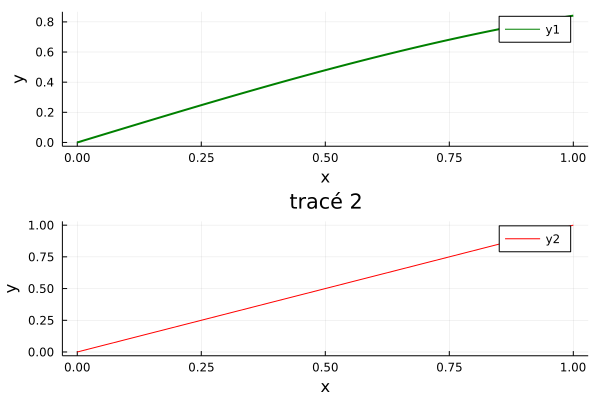

In [15]:
p = plot(layout=(2,1))
plot!(p[1,1], x, sin.(x), lc = :green, linewidth = 2.0)
plot!(p[2,1], x, x, lc = :red)
title!(p[2,1], "tracé 2")
xlabel!("x")
ylabel!("y")

In [2]:
import Pkg

Pkg.add("PyPlot")
Pkg.build("PyPlot")

   Resolving package versions...
  No Changes to `~/JuliaProjects/Julia_Introduction/Project.toml`
  No Changes to `~/JuliaProjects/Julia_Introduction/Manifest.toml`
    Building Conda ─→ `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/6e47d11ea2776bc5627421d59cdcc1296c058071/build.log`
    Building PyCall → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/1fc929f47d7c151c839c5fc1375929766fb8edcc/build.log`


In [ ]:
import PyPlot
PyPlot.subplot(2,1,1)
PyPlot.plot(x,sin.(x),"g",linewidth=2.0)
PyPlot.subplot(2,1,2)
PyPlot.plot(x,x,"r")
PyPlot.grid(true)
PyPlot.title("tracé 2")

In [20]:
import Pkg; Pkg.add("PlotlyJS")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed JSExpr ────── v0.5.3
   Installed Kaleido_jll ─ v0.2.1+0
   Installed Pidfile ───── v1.3.0
   Installed Widgets ───── v0.6.6
   Installed PlotlyBase ── v0.8.18
   Installed PlotlyJS ──── v0.18.8
   Installed WebIO ─────── v0.8.17
    Updating `~/JuliaProjects/Julia_Introduction/Project.toml`
  [f0f68f2c] + PlotlyJS v0.18.8
    Updating `~/JuliaProjects/Julia_Introduction/Manifest.toml`
  [bf4720bc] + AssetRegistry v0.1.0
  [9e28174c] + BinDeps v1.0.2
  [ad839575] + Blink v0.12.5
  [de31a74c] + FunctionalCollections v0.5.0
  [9fb69e20] + Hiccup v0.2.2
  [97c1335a] + JSExpr v0.5.3
  [50d2b5c4] + Lazy v0.15.1
  [ffc61752] + Mustache v1.0.13
  [a975b10e] + Mux v0.7.6
  [d96e819e] + Parameters v0.12.3
  [fa939f87] + Pidfile v1.3.0
  [a03496cd] + PlotlyBase v0.8.18
  [f0f68f2c] + PlotlyJS v0.18.8
  [30578b45] + URIParser v0.4.1
  [3a884ed6] + UnPack v1.0.2
  [0f1e0344] + WebIO v0.8.17
  

In [ ]:
using Plots
plotlyjs()
n = 1024
X = randn(n)
Y = randn(n)
scatter(X, Y, exp.(-(X.^2+Y.^2)))

WebIO._IJuliaInit()

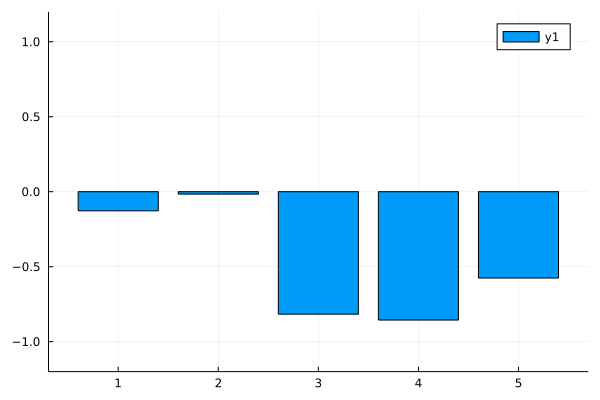

In [3]:
X = rand(5)
Y =-rand(5)
bar(1:5,X,facecolor="#9999ff", edgecolor="white")
bar(1:5,Y,facecolor="#ff9999", edgecolor="white")
for i=1:5
    txt=string(X[i])
    text(i+0.1,X[i]+0.01,txt[1:7])
    txt=string(Y[i])
    text(i+0.1,Y[i]-0.08,txt[1:7])
end
ylims!(-1.2,1.2)

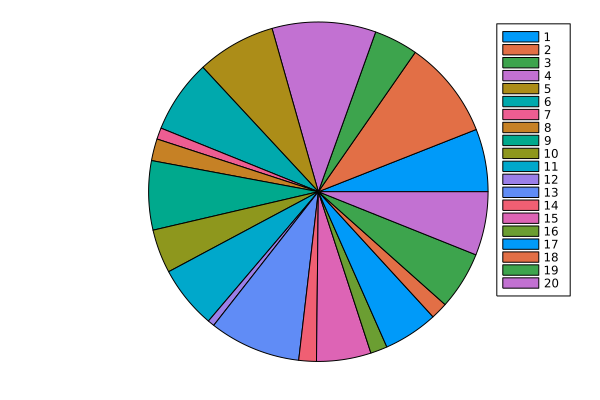

In [4]:
z=rand(20)
pie(z)

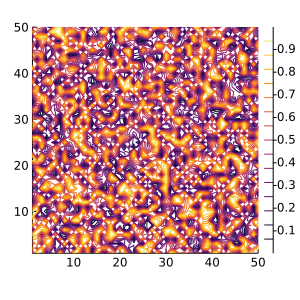

In [5]:
contour(rand(50,50), colobar = true, aspect_ratio = :equal, size = (300,300))

In [6]:
palette(:rainbow)

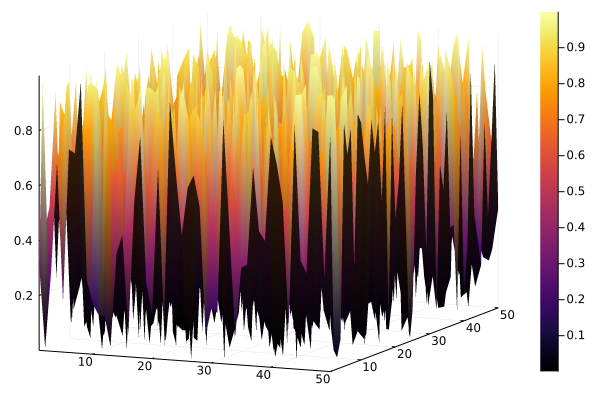

In [7]:
surface(rand(50,50), palette = :rainbow)

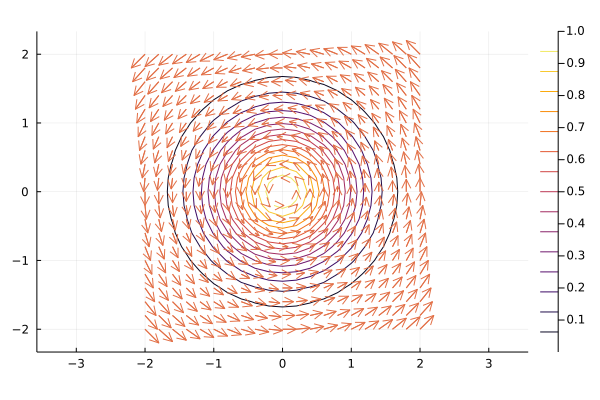

In [8]:
x = LinRange(-2, 2, 21)
y = x
z = exp.(-x.^2 .- y'.^2)
contour(x, y, z, aspect_ratio = :equal)

v(x, y) = 0.1 .* [-y, x]

xs = [px for px in x for py in y]
ys = [py for px in x for py in y]

quiver!(xs, ys, quiver=v)

D'autres packages sont disponibles :
- Gadfly 
- UnicodePlots 
- Makie
voir [JuliaPlots](https://github.com/JuliaPlots) et [JuliaGraphics](https://github.com/JuliaGraphics)

## DataFrames

But : travailler avec des tables de données.
Ce sont des tables dont les colonnes sont des DataArray. Voici deux façons de construire des DataFrames :

In [9]:
using DataFrames

In [10]:
df = DataFrame(A = 1:4, B = ["M", "F", "F", "M"])

,A,B
,Int64,String
1,1,M
2,2,F
3,3,F
4,4,M


In [11]:
df = DataFrame()
df[!,:A] = 1:8
df[!,:B] = ["M", "F", "F", "M", "F", "M", "M", "F"]
df

,A,B
,Int64,String
1,1,M
2,2,F
3,3,F
4,4,M
5,5,F
6,6,M
7,7,M
8,8,F


In [12]:
nrows = size(df, 1) # nombre de ligne
ncols = size(df, 2) # nombre de colonne

2

In [13]:
first(df)#Voir le début du tableau

,A,B
,Int64,String
1,1,M


In [14]:
last(df) #Voir la fin du tableau

,A,B
,Int64,String
8,8,F


In [15]:
df[1:3, :] #Voir les lignes 1,2,3 du tableau

,A,B
,Int64,String
1,1,M
2,2,F
3,3,F


Nous avons l'analogie avec summarize du logiciel R :

In [16]:
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,A,4.5,1,4.5,8,0,Int64
2,B,,F,,M,0,String


Pour aller plus loin dans le travail statistique sur les Dataframes il nous faut le package RDatasets qui va fournir nombres exemples et on va y retrouver beaucoup de fonctionnalités communes au logiciel R.

In [17]:
using RDatasets

In [18]:
iris = dataset("datasets", "iris")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
